In [39]:
# Importando Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# Desligando alguns avisos para melhor visualização
import warnings
warnings.filterwarnings('ignore')

# Carregando dataset
df = pd.read_csv('marketing-ifood.csv')

In [40]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# 1. Análise Exploratória de Dados

* Identificando valores nulos

In [41]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

Observamos que há 24 valores nulos na coluna Income.
 * Vamos plotar um grafico para identificar a melhor estrategia para substitui-los

Text(0, 0.5, 'Qtd')

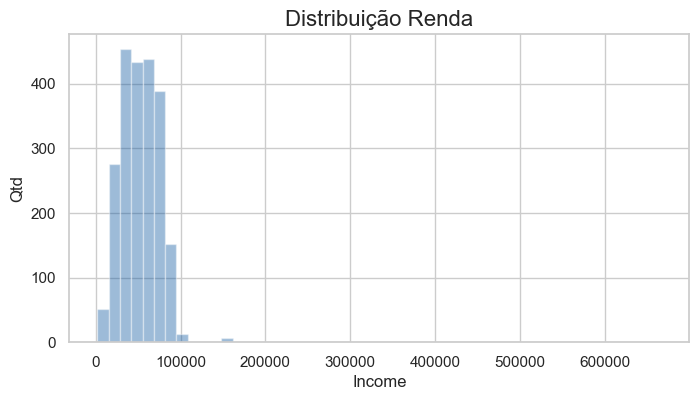

In [42]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Distribuição Renda', size=16)
plt.ylabel('Qtd')

 * Descobrimos que  maioria das rendas é distribuída entre US$ 0 e US$ 100.000, com alguns valores discrepantes
  - Adicionaremos aos valores nulos um valor mediano, para evitar efeitos de outliers no resultado.

<Axes: >

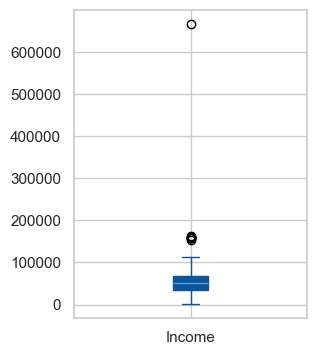

In [43]:
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [44]:
df['Income'] = df['Income'].fillna(df['Income'].median())

Vamos em busca de outros outliers que podem afetar nossa análise.

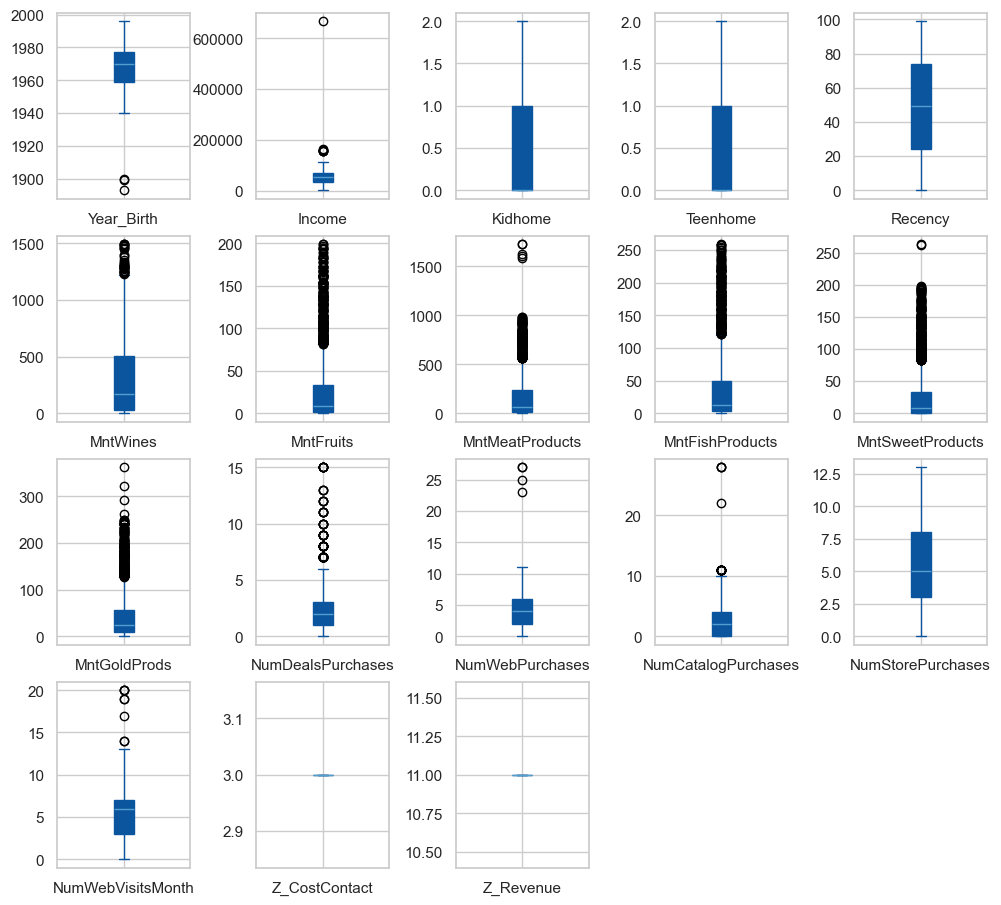

In [45]:
# Selecionamos as colunas 
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

df_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Notamos mais dados com possíveis erros, mas o único que indica erro de entrada é o ano de nascimento(Year_Birth), no qual temos pessoas que nasceram antes de 1900, o que convenhamos que não é algo muito provável de ser verdade. 

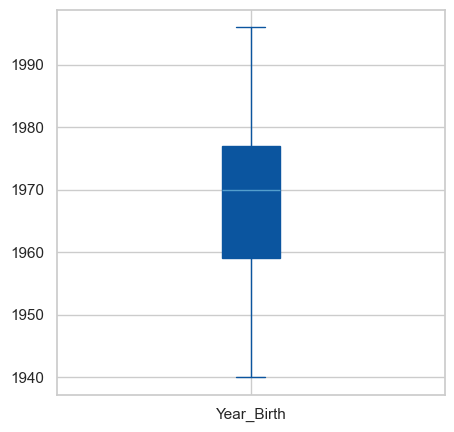

In [46]:
# Removemos aqueles com data de nascimento < 1900
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(5,5))
df['Year_Birth'].plot(kind='box', patch_artist=True);

### Agora, com os dados limpos, quais variaveis podemos criar com os dados que possuímos?
  * Podemos criar a variável ano em que se tornou cliente ('Year_Customer') com os dados de 'Dt_Custumer'.
  * Podemos criar a variável Dependentes ('Dependents') com base na soma dos dados 'Kidhome' e 'Teenhome'.
  * Podemos criar a variável Total gasto ('TotalMnt') somando tudo com a palavra 'Mnt'.
  * Podemos criar a variável Total de compras ('TotalPurchases') somando tudo com a palavra 'Purchases'.
  * Podemos criar a variável Campanhas aceitas ('TotalCampaignsAcc') com a noma de todos os dados com a palavra 'Cmp' e 'Response'(da última).

In [47]:
# Vou puxar a lista para poder copiar mais rapido
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [48]:
# Criando nossas variáveis
## Deixarei as variáveis criadas em inglês para não haver conflito na linguagem do dataframe.

# Ano em que se tornou cliente
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Dependentes
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Total gasto
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total compras
purchase_col = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchase_col].sum(axis=1)

# Total de campanhas aceitas
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' sera utilizado para a ultima campanha 
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

In [49]:
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,5524,0,2012,1617,25,1
1,2174,2,2014,27,6,0
2,4141,0,2013,776,21,0
3,6182,1,2014,53,8,0
4,5324,1,2014,422,19,0


### Trabalhando com os dados

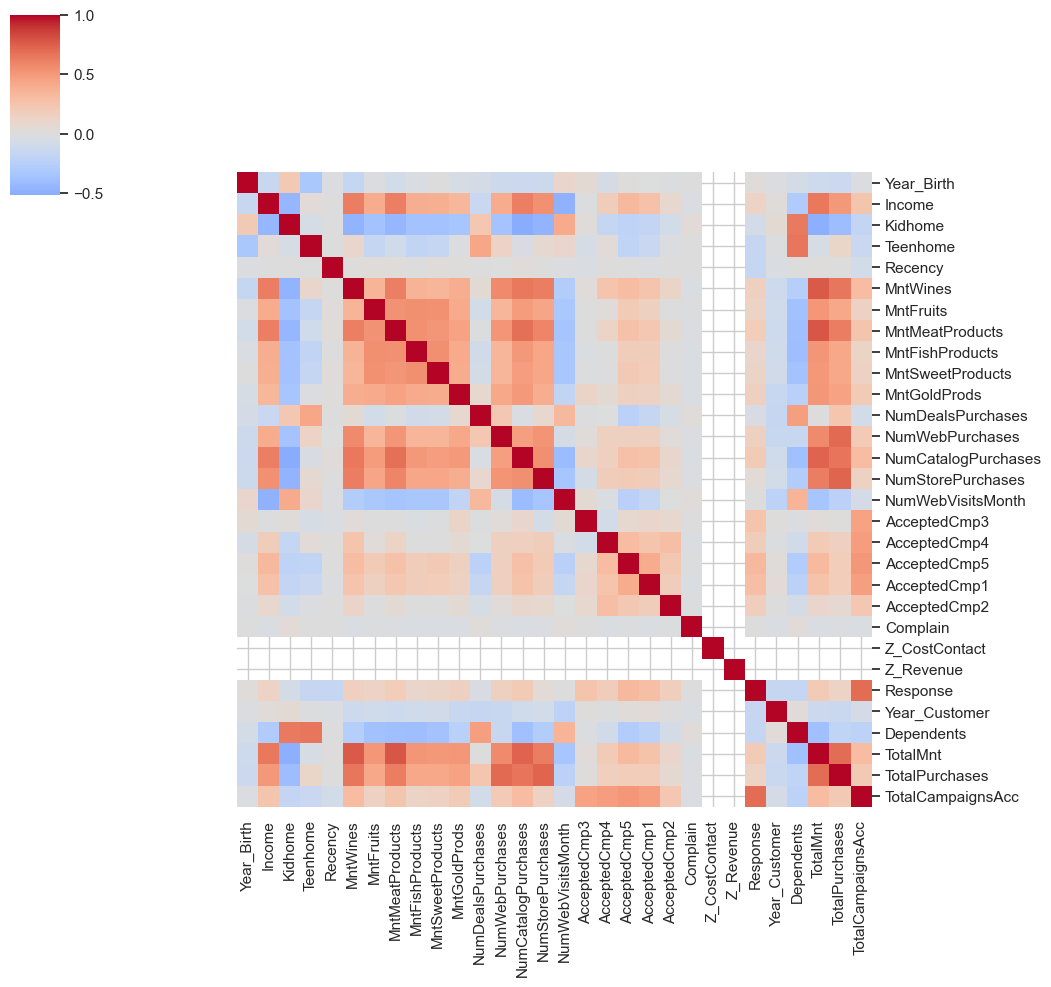

In [50]:
#Criando uma Matrix de correlação
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')
# Utilizaremos um teste sem parâmetros de correlação (kebdall), já que alguns dados são binarios.

# Plotando um clustered heatmap de correlações
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0, row_cluster=False, col_cluster=False)

Descobrimos duas colunas frustrando nossa correlação, vou remove-las ja que não vão impactar muito em nossa analise.

In [51]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Dependents,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,0,1617,25,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,2,27,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,0,776,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,1,53,8,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,422,19,0


In [52]:
dropacoluna = ['Z_CostContact', 'Z_Revenue']
df = df.drop(columns= dropacoluna)

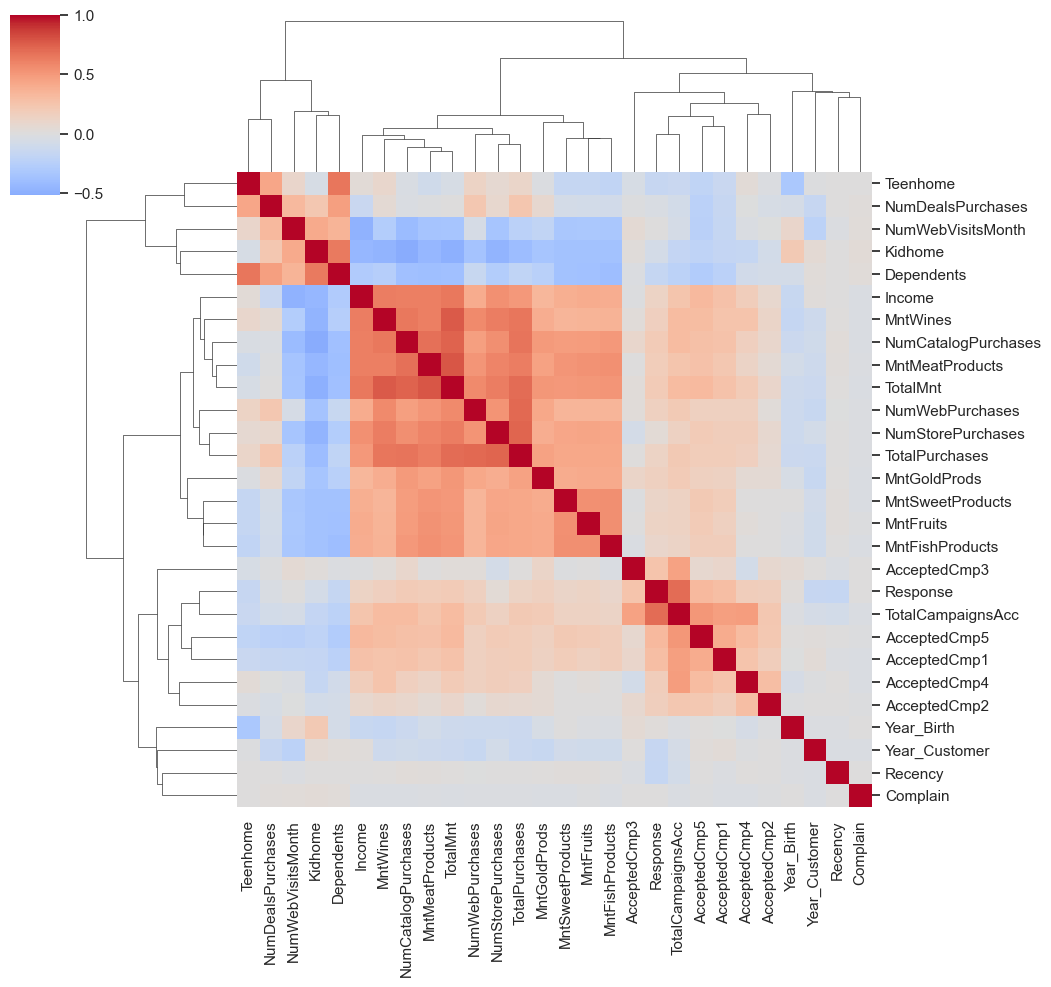

In [53]:
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')
corrs_both_sides = pd.concat([corrs, corrs], axis=1)
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0)

## Neste heatmap nós podemos observar os seguintes clusters de correlações:
 ### O cluster de Alta Renda (*'High Income'*)
 - O total gasto ('TotalMnt' e outros dados com 'Mnt') e o Total de compras ('TotalPurchase' assim como outros dados Num...Purchases) estão positivamente correlacionados com a Renda('Income').
 - Comprar na loja, na web ou por catálogo ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') está positivamente correlacionado com Renda(Income).
 ### O cluster tem crianças e adolescentes (*'Have Kids & Teens'*)
 - O total de compras ('TotalPurchases' e outros dados 'Num...Purchases) estão negativamente correlacionados com os Dependentes ('Dependents') com um efeito mais forte de crianças vs. adolescentes.
 - Compras feitas ('NumDealsPurchases') estão positivamente correlacionadas com Dependentes ('Dependents') e estão negativamente correlacionadas com a Renda ('Income)
 ### O cluster "Campanhas publicitárias" (*"Advertising Campaigns"*)
 - A aceitação das campanhas publicitárias ('AcceptedCmp' e 'Response') estão fortemente correlacionadas positivamente entre si.
 - Fraca correlação positiva das campanhas publicitárias é observada com o cluster Alta Renda ('High Income') e fraca correlação negativa é observada com o cluster Ter crianças e adolescentes('Have Kids & Teens').

 ## Anomalias:
 - Surpreendentemente, o número de visitas ao site no último mês ('NumWebVisitsMonth') não se correlaciona com um aumento no número de compras na web ('NumWebPurchases').
 - Em vez disso, o número de visitas ao site no último mês 'NumWebVisitsMonth' está positivamente correlacionado com o número de ofertas compradas ('NumDealsPurchases'), sugerindo que as ofertas são uma forma eficaz de estimular compras no site.

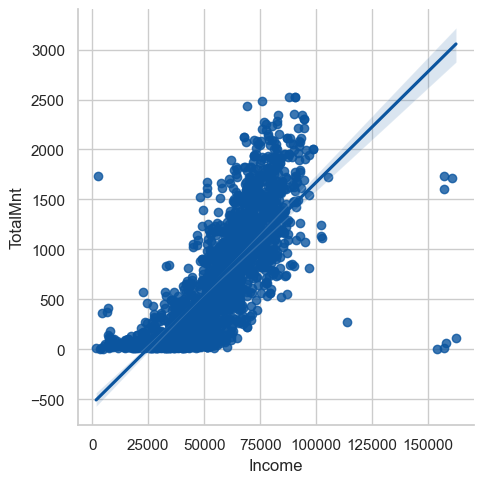

In [54]:
#Vamos ilustrar o efeito de alta renda('High Income')
sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income'] < 200000]); #Para melhorar a visualização, vamos limitar a renda para < 200000 assim removeremos efeitos de outliers.


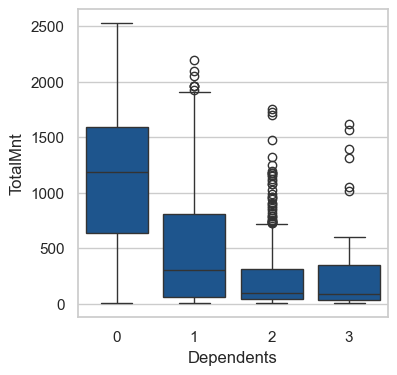

In [55]:
#Vamos ilustrar o efeito de Tem crianças e adolescentes ('Have kids and teens')
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df);

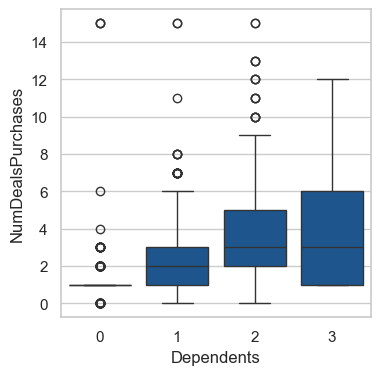

In [56]:
# Plotar uma ilustração do efeito positivo de haver dependentes('Dependents') com o numero de ofertas compradas('NumDealsPurchases'):
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df);

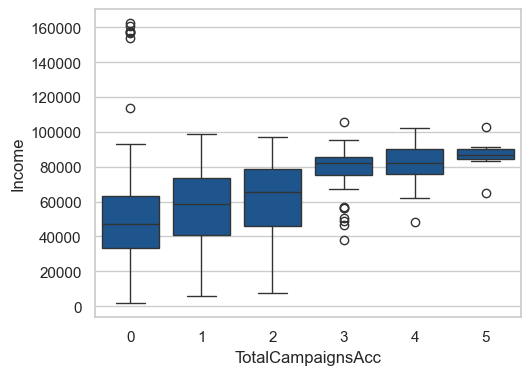

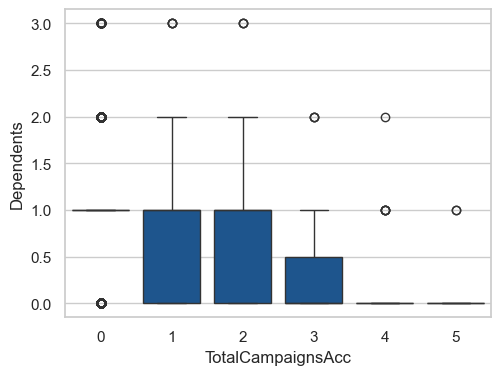

In [57]:
# Vamos plotar também o efeito positivo de renda('Income') e o efeito negativo de ter crianças e adolescentes('Have kids and teens') com base na aceitação da campanha publicitária:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df[df['Income']<200000]); #Mais uma vez vou limitar a renda para < 200000 assim removeremos efeitos de outliers.

plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Dependents', data=df);

 * Investigando Anomalias:
  - O número de visitas no site no último mês não está positivamente relacionado com o número de compras no site
  - Em vez disso, o número de visitas ao site no último mês está positivamente correlacionado com o número de ofertas compradas, sugerindo que as ofertas são uma forma eficaz de estimular compras no site.

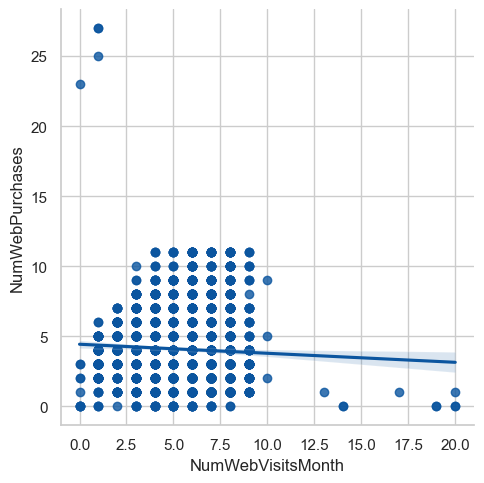

In [58]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);

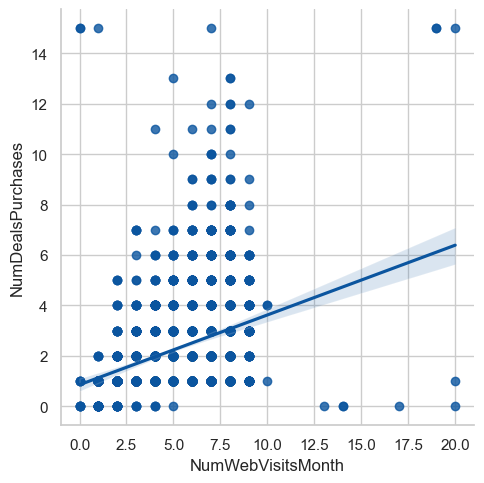

In [59]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df)

# 2. Análise Estatística

### Quais fatores estão significativamente relacionados com o número de compras?
  * Usaremos um modelo de regressão linear com o número de compras na loja('NumStorePurchases') como um alvo variável, então, usaremos técnicas de Machine Learning para extrair insights sobre quais recursos preveem o número de compras na loja.

Text(0.5, 1.0, 'Distribuição do Número de compras na loja')

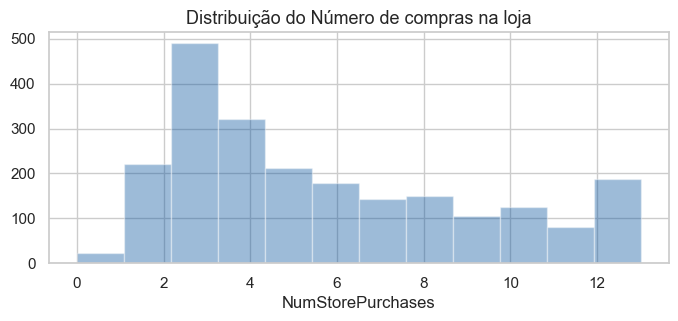

In [60]:
# Começaemos plotando um alvo variável:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('Distribuição do Número de compras na loja', size=13)

In [61]:
#Removeremos os dados que não agregam em nossa análise
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [62]:
#Usaremos o OneHotEncoder,ele converte variáveis categóricas em um formato numérico, tornando-as adequadas para serem usadas em algoritmos de Machine Learning que exigem entradas numéricas.
from sklearn.preprocessing import OneHotEncoder

#Obtemos os dados de categoria e revisamos os valores únicos
cat = df.select_dtypes(exclude=np.number)
print("Número de valores unicos por categoria:/n", cat.nunique())

#Usando OneHotEncoder
enc = OneHotEncoder(sparse_output=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names_out(cat.columns)

#Fazemos o merge com dados númericos
num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

Número de valores unicos por categoria:/n Education         5
Marital_Status    8
dtype: int64


,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Customer,Dependents,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,0,1617,25,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,2,27,6,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,0,776,21,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,1,53,8,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,422,19,0


- Ajustar o modelo de regressão linear aos dados de treinamento (70% do conjunto de dados)
- Avaliar as previsões nos dados de teste (30% do conjunto de dados) usando RMSE:
* *Nota:O RMSE(Root Mean Square Error) mede a diferença entre os valores observados e os valores previstos pelo modelo*

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Isolamos as variáveis X e y, então fazemos um train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

#Previsões
prev = model.predict(X_test)

#Avaliamos o modelo usando RMSE
print("Regressão Linear modelo RMSE: ", np.sqrt(mean_squared_error(y_test, prev)))
print("Valor Médio do alvo variável: ", y.median())

Regressão Linear modelo RMSE:  5.430403888000399e-13
Valor Médio do alvo variável:  5.0


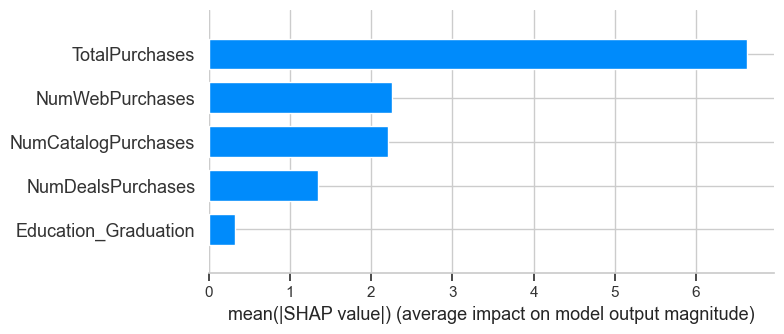

In [64]:
import shap
# Criamos o objeto explainer passando o modelo e os dados de treinamento
explainer = shap.Explainer(model, X_train)
# Calculamos as importâncias das características
shap_values = explainer.shap_values(X_test)
# Plotamos as importâncias das características
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=5)

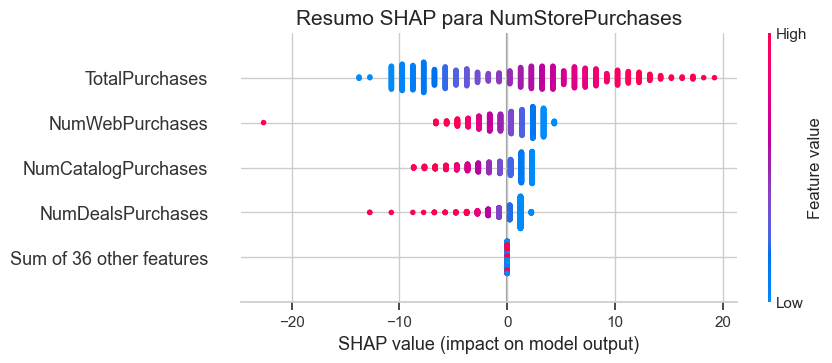

In [65]:
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('Resumo SHAP para NumStorePurchases', size=15 )
shap.plots.beeswarm(shap_values, max_display=5);

### Descobertas
 - A quantidade de compras em lojas aumenta com um maior número total de compras ('TotalPurchases').
 - A quantidade de compras em lojas diminui com um maior número de compras via catálogo, site ou ofertas ('NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases').
### Interpretação
 - Os clientes que mais compram em lojas são aqueles que compram menos por meio de catálogo, site ou ofertas.

## Supondo uma tarefa

1-Seu supervisor insiste que pessoas que compram ouro são mais conservadoras. Portanto, pessoas que gastaram uma quantidade acima da média em ouro nos últimos 2 anos teriam mais compras em lojas. Justifique ou refute esta afirmação usando um teste estatístico apropriado.
* Plotar a relação entre o valor gasto em ouro nos últimos 2 anos (MntGoldProds) e o número de compras em lojas (NumStorePurchases):
* Resultados: Existe uma relação positiva, mas é estatisticamente significativa?

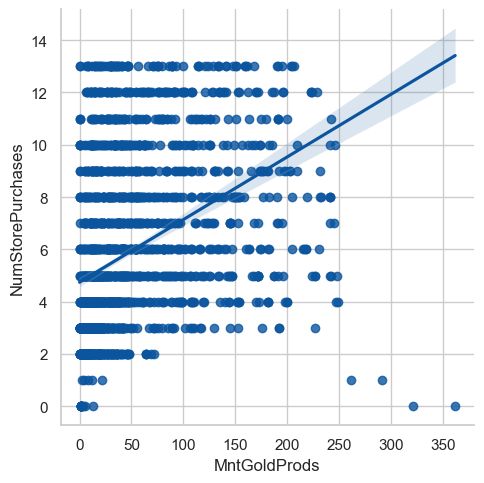

In [66]:
# Vamos plotar essa questão para uma melhor visualização
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = df);

In [67]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

print('Correlação: ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Correlação:  0.3927160395725131
Kendall p-value:  3.5588181790543497e-152


* Realizando uma performace de correlação com Kendall(um teste non-parametric ja que 'MntGoldProducts' não normalmente distribuído e contém outliers)
* Descoberta: Há uma significavel correlação positiva entre o valor gasto em ouro ('MntGoldPurchases') e o número de compras na loja('NumStorePurchases')

2-O peixe contém ácidos graxos Ômega 3, que são bons para o cérebro. De acordo com isso, candidatos casados e com PhD('Married PhD') têm uma relação significativa com o valor gasto em produtos de peixe?
* Vamos comparar as compras em produtos de peixe('MntFishProducts') entre as pessoas casadas e com PhD e todos as outras pessoas:


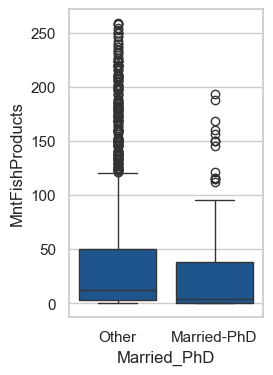

In [68]:
# Vamos somar os status de relacionamento e os status de educação PhD para criar casados e com PhD('Married_PhD')
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

# Vamos plotar o gasto com produtos de peixes('MntFishProducts') ao lado de casados e com PhD('Married_PhD'))
plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2);

* Resultados: As pessoas casadas e com PhD gastam significativamente menos em produtos de peixe em comparação com outras pessoas.

# 3. Visualização de dados

### Qual campanha obteve maior sucesso?

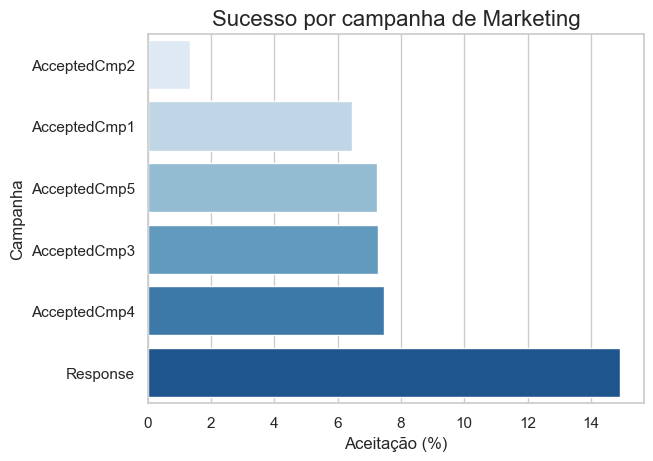

In [69]:
# Calculando as taxas de sucesso
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, columns = ['Percent']).reset_index()

# Plotagem 
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Aceitação (%)')
plt.ylabel('Campanha')
plt.title('Sucesso por campanha de Marketing', size=16);

A campanha de maior sucesso foi a mais recente (Coluna: 'Response')

### Vamos identificar o tipo padrão dos clientes da companhia

In [70]:
# Uma lista de colunas binarias
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# Uma lista das colunas de gasto
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# Uma lista de colunas por canal
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [71]:
# Visão demografica de cliente 
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(numeric_only=True), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])
demographics

,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


### O cliente médio da companhia é aquele que:
 * Nasceu em 1969.
 * Se tornou cliente em 2013.
 * Possui uma renda por volta de $52,000 por ano.
 * Possui 1 dependente (Criança ou adolescente)
 * Fez ao menos uma compra com a companhia nos últimos 49 dias.

## Qual produto tem se destacado melhor?

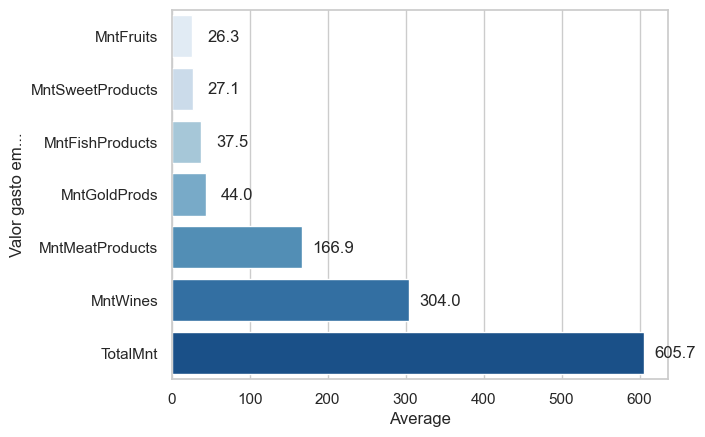

In [72]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plotando
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Valor gasto em...')

## adicionando texto para cada barra
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

### O cliente médio da empresa gasta:
 * $25-50 com frutas, doces, peixe ou produtos de ouro.
 * Acima de $160 em produtos de carne.
 * Acima de $300 em Vinhos.
 * Acima de $600 no total.
- Produtos com a melhor performasse:
 * Vinho
 * Carne

## Quais canais estão com o pior desempenho?

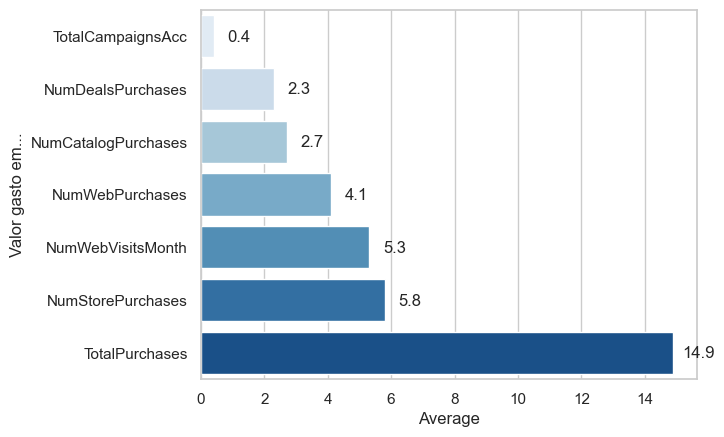

In [73]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plotando
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Valor gasto em...')

# adicionando texto para cada barra
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center")

### O cliente médio da empresa:
 * Aceitou menos de 1 campanha de marketing
 * Fez 2 compras de ofertas, 2 compras por catalogo, 4 compras no site e 5 compras na loja
 * Uma media de 14 compras no total
 * Visitou o site 5 vezes
- Canais com a pior performace:
 * Campanhas de publicidade
 * Ofertas e catalogo

# 4. Conclusão

## Resumo das descobertas acionáveis para melhorar o sucesso da campanha publicitária:

 ### A campanha publicitária mais bem-sucedida foi a mais recente (coluna:'Response').
 * Ação sugerida: Permacer com os criterios atuais e o ingrementar.
 ### A aceitação da campanha publicitária está positivamente correlacionada com a renda e negativamente correlacionada com o fato de haver dependentes crianças/adolescentes.
 * Ação sugerida: Criar duas vertentes de campanhas publicitárias direcionadas, uma voltada para indivíduos de alta renda sem crianças/adolescentes e outra voltada para indivíduos de baixa renda com crianças/adolescentes.
### Os produtos mais bem-sucedidos são vinhos e carnes (ou seja, o cliente médio gastou mais nesses itens)
Ação sugerida: Focar as campanhas publicitárias em impulsionar as vendas dos itens menos populares.
### Os canais com desempenho inferior são ofertas e compras por catálogo (ou seja, o cliente médio fez menos compras por esses canais)
### Os canais com melhor desempenho são compras pela web e em lojas (ou seja, o cliente médio fez mais compras por esses canais)
 * Ação sugerida: Focar as campanhas publicitárias nos canais mais bem-sucedidos, para alcançar mais clientes.